![Bluemetrica](../bluemetrica_large.png)

# Ćwiczenie: problem regresji (prognozujemy ceny domów)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Wczytujemy dane

In [2]:
df = pd.read_csv("../house data/train.csv", index_col = 0)

### Informacja na temat danych

*source: kaggle.com*

Set contains data about home prices in one of the towns in Iowa

-	**SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
-	**MSSubClass**: The building class
-	**MSZoning**: The general zoning classification
-	**LotFrontage**: Linear feet of street connected to property
-	**LotArea**: Lot size in square feet
-	**Street**: Type of road access
-	**Alley**: Type of alley access
-	**LotShape**: General shape of property
-	**LandContour**: Flatness of the property
-	**Utilities**: Type of utilities available
-	**LotConfig**: Lot configuration
-	**LandSlope**: Slope of property
-	**Neighborhood**: Physical locations within Ames city limits
-	**Condition1**: Proximity to main road or railroad
-	**Condition2**: Proximity to main road or railroad (if a second is present)
-	**BldgType**: Type of dwelling
-	**HouseStyle**: Style of dwelling
-	**OverallQual**: Overall material and finish quality
-	**OverallCond**: Overall condition rating
-	**YearBuilt**: Original construction date
-	**YearRemodAdd**: Remodel date
-	**RoofStyle**: Type of roof
-	**RoofMatl**: Roof material
-	**Exterior1st**: Exterior covering on house
-	**Exterior2nd**: Exterior covering on house (if more than one material)
-	**MasVnrType**: Masonry veneer type
-	**MasVnrArea**: Masonry veneer area in square feet
-	**ExterQual**: Exterior material quality
-	**ExterCond**: Present condition of the material on the exterior
-	**Foundation**: Type of foundation
-	**BsmtQual**: Height of the basement
-	**BsmtCond**: General condition of the basement
-	**BsmtExposure**: Walkout or garden level basement walls
-	**BsmtFinType1**: Quality of basement finished area
-	**BsmtFinSF1**: Type 1 finished square feet
-	**BsmtFinType2**: Quality of second finished area (if present)
-	**BsmtFinSF2**: Type 2 finished square feet
-	**BsmtUnfSF**: Unfinished square feet of basement area
-	**TotalBsmtSF**: Total square feet of basement area
-	**Heating**: Type of heating
-	**HeatingQC**: Heating quality and condition
-	**CentralAir**: Central air conditioning
-	**Electrical**: Electrical system
-	**1stFlrSF**: First Floor square feet
-	**2ndFlrSF**: Second floor square feet
-	**LowQualFinSF**: Low quality finished square feet (all floors)
-	**GrLivArea**: Above grade (ground) living area square feet
-	**BsmtFullBath**: Basement full bathrooms
-	**BsmtHalfBath**: Basement half bathrooms
-	**FullBath**: Full bathrooms above grade
-	**HalfBath**: Half baths above grade
-	**Bedroom**: Number of bedrooms above basement level
-	**Kitchen**: Number of kitchens
-	**KitchenQual**: Kitchen quality
-	**TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
-	**Functional**: Home functionality rating
-	**Fireplaces**: Number of fireplaces
-	**FireplaceQu**: Fireplace quality
-	**GarageType**: Garage location
-	**GarageYrBlt**: Year garage was built
-	**GarageFinish**: Interior finish of the garage
-	**GarageCars**: Size of garage in car capacity
-	**GarageArea**: Size of garage in square feet
-	**GarageQual**: Garage quality
-	**GarageCond**: Garage condition
-	**PavedDrive**: Paved driveway
-	**WoodDeckSF**: Wood deck area in square feet
-	**OpenPorchSF**: Open porch area in square feet
-	**EnclosedPorch**: Enclosed porch area in square feet
-	**3SsnPorch**: Three season porch area in square feet
-	**ScreenPorch**: Screen porch area in square feet
-	**PoolArea**: Pool area in square feet
-	**PoolQC**: Pool quality
-	**Fence**: Fence quality
-	**MiscFeature**: Miscellaneous feature not covered in other categories
-	**MiscVal**: $Value of miscellaneous feature
-	**MoSold**: Month Sold
-	**YrSold**: Year Sold
-	**SaleType**: Type of sale
-	**SaleCondition**: Condition of sale


### Oglądamy dane, sprawdzamy brakujące wartości

Fragment kodu poniżej przyda nam się później
`
#Brakujące dane liczbowe wypełnimy medianami, brakujące kategorie - modą czyli inaczej dominantą

df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace = True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace = True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True)`

In [3]:
df.shape

(1460, 80)

In [4]:
df.isnull().mean().sort_values(ascending = False).round(3)

PoolQC           0.995
MiscFeature      0.963
Alley            0.938
Fence            0.808
FireplaceQu      0.473
LotFrontage      0.177
GarageType       0.055
GarageCond       0.055
GarageFinish     0.055
GarageQual       0.055
GarageYrBlt      0.055
BsmtFinType2     0.026
BsmtExposure     0.026
BsmtQual         0.025
BsmtCond         0.025
BsmtFinType1     0.025
MasVnrArea       0.005
MasVnrType       0.005
Electrical       0.001
RoofMatl         0.000
Exterior1st      0.000
RoofStyle        0.000
ExterQual        0.000
Exterior2nd      0.000
YearBuilt        0.000
ExterCond        0.000
Foundation       0.000
YearRemodAdd     0.000
SalePrice        0.000
OverallCond      0.000
                 ...  
GarageArea       0.000
PavedDrive       0.000
WoodDeckSF       0.000
OpenPorchSF      0.000
3SsnPorch        0.000
BsmtUnfSF        0.000
ScreenPorch      0.000
PoolArea         0.000
MiscVal          0.000
MoSold           0.000
YrSold           0.000
SaleType         0.000
Functional 

In [5]:
df['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [6]:
# Heatmapa brakujących wartości
plt.figure(figsize= (16,12))
sns.heatmap(np.transpose(df.isnull()), cbar = False)

In [7]:
# Usuwamy zmienne, w których brakuje ponad 50% danych
df.isnull().mean() > 0.5

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu      False
GarageType       False
GarageYrBlt      False
GarageFinish     False
GarageCars       False
GarageArea       False
GarageQual 

In [8]:
# Uswamy te zmienne gdzie brakuje ponad 50% danych
# tresh - oznacza liczbę
df.dropna(axis= 1, thresh= np.floor(df.shape[0]/2), inplace= True)

In [9]:
df.shape

(1460, 76)

In [10]:
from sklearn.feature_selection import VarianceThreshold

In [11]:
#sel = VarianceThreshold(threshold=0.01)
#sel.fit_transform(df)

In [12]:
df.isnull().mean().sort_values(ascending = False).round(3)

FireplaceQu      0.473
LotFrontage      0.177
GarageCond       0.055
GarageType       0.055
GarageYrBlt      0.055
GarageFinish     0.055
GarageQual       0.055
BsmtExposure     0.026
BsmtFinType2     0.026
BsmtFinType1     0.025
BsmtCond         0.025
BsmtQual         0.025
MasVnrType       0.005
MasVnrArea       0.005
Electrical       0.001
YearBuilt        0.000
Exterior2nd      0.000
Exterior1st      0.000
ExterQual        0.000
ExterCond        0.000
Foundation       0.000
RoofMatl         0.000
RoofStyle        0.000
YearRemodAdd     0.000
SalePrice        0.000
OverallCond      0.000
OverallQual      0.000
HouseStyle       0.000
BldgType         0.000
Condition2       0.000
                 ...  
GarageArea       0.000
PavedDrive       0.000
WoodDeckSF       0.000
OpenPorchSF      0.000
3SsnPorch        0.000
BsmtUnfSF        0.000
ScreenPorch      0.000
PoolArea         0.000
MiscVal          0.000
MoSold           0.000
YrSold           0.000
SaleType         0.000
Functional 

In [13]:
df['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [14]:
# Sprawdzamy, czy naprawdę tak jest że osoby, które nie mają kominka mają NaN w FireplaceQu
df.groupby('Fireplaces').apply(lambda x: pd.isnull(x).sum())['FireplaceQu']

Fireplaces
0    690
1      0
2      0
3      0
Name: FireplaceQu, dtype: int64

In [15]:
df['FireplaceQu'].fillna("Brak", inplace = True)

In [16]:
df['FireplaceQu'].value_counts()

Brak    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [17]:
df.isnull().mean().sort_values(ascending = False).round(3)

LotFrontage      0.177
GarageFinish     0.055
GarageType       0.055
GarageYrBlt      0.055
GarageCond       0.055
GarageQual       0.055
BsmtFinType2     0.026
BsmtExposure     0.026
BsmtFinType1     0.025
BsmtCond         0.025
BsmtQual         0.025
MasVnrArea       0.005
MasVnrType       0.005
Electrical       0.001
RoofMatl         0.000
Exterior1st      0.000
ExterQual        0.000
Exterior2nd      0.000
YearRemodAdd     0.000
ExterCond        0.000
Foundation       0.000
BsmtFinSF1       0.000
RoofStyle        0.000
SalePrice        0.000
YearBuilt        0.000
LotConfig        0.000
MSZoning         0.000
LotArea          0.000
Street           0.000
LotShape         0.000
                 ...  
GarageArea       0.000
PavedDrive       0.000
WoodDeckSF       0.000
OpenPorchSF      0.000
3SsnPorch        0.000
TotalBsmtSF      0.000
ScreenPorch      0.000
PoolArea         0.000
MiscVal          0.000
MoSold           0.000
YrSold           0.000
SaleType         0.000
Fireplaces 

In [18]:
# pad - w przypadku time series

df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace = True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace = True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True)

In [19]:
df.isnull().mean().sort_values(ascending = False).round(3)

GarageCond       0.055
GarageType       0.055
GarageYrBlt      0.055
GarageFinish     0.055
GarageQual       0.055
BsmtFinType2     0.026
BsmtExposure     0.026
BsmtFinType1     0.025
BsmtCond         0.025
BsmtQual         0.025
RoofStyle        0.000
RoofMatl         0.000
Exterior1st      0.000
MasVnrType       0.000
Exterior2nd      0.000
YearBuilt        0.000
MasVnrArea       0.000
ExterQual        0.000
ExterCond        0.000
Foundation       0.000
BsmtFinSF1       0.000
YearRemodAdd     0.000
SalePrice        0.000
OverallCond      0.000
Utilities        0.000
MSZoning         0.000
LotFrontage      0.000
LotArea          0.000
Street           0.000
LotShape         0.000
                 ...  
PavedDrive       0.000
WoodDeckSF       0.000
OpenPorchSF      0.000
3SsnPorch        0.000
Functional       0.000
ScreenPorch      0.000
PoolArea         0.000
MiscVal          0.000
MoSold           0.000
YrSold           0.000
SaleType         0.000
Fireplaces       0.000
TotRmsAbvGr

In [20]:
# Garaż i piwnica - robimy to samo co z kominkiem
df['GarageYrBlt'].fillna(0, inplace = True)

In [21]:
df.fillna("Brak", inplace = True)

In [22]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

## Wizualizacja danych i przekodowanie

MSSubClass: The building class

In [23]:
df['MSSubClass'].head()

Id
1    60
2    20
3    60
4    70
5    60
Name: MSSubClass, dtype: int64

In [24]:
plt.figure(figsize = (12,12))
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = df)

In [25]:
df['MSSubClass'] = df['MSSubClass'].astype('str')

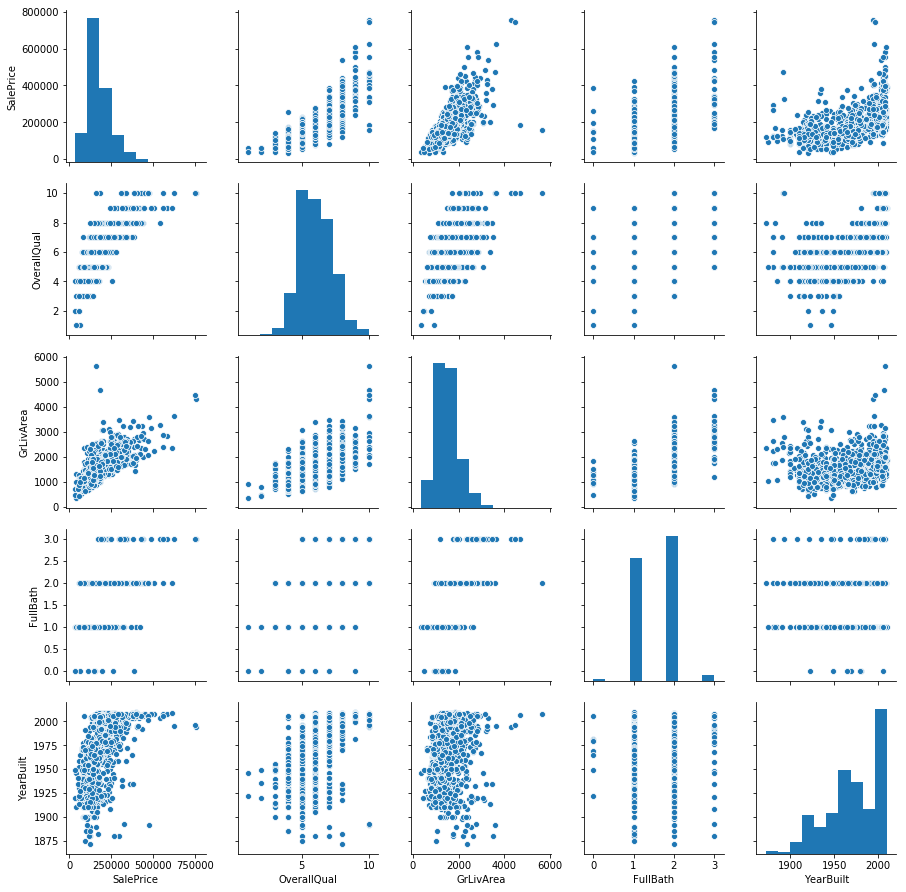

In [26]:
sns.pairplot(df[['SalePrice', 'OverallQual', 'GrLivArea', 'FullBath', 'YearBuilt']])

In [27]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

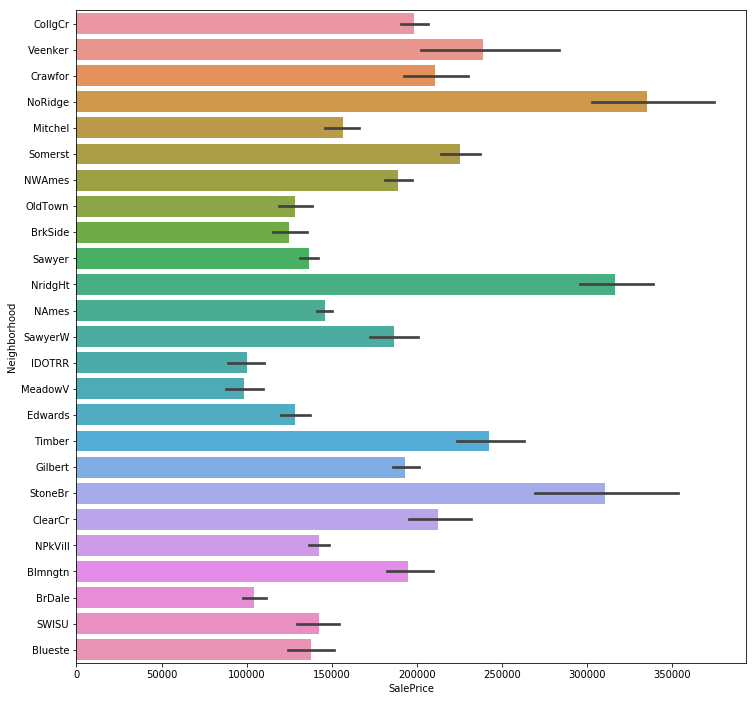

In [28]:
plt.figure(figsize = (12,12))
sns.barplot(x = 'SalePrice', y = 'Neighborhood', data = df)

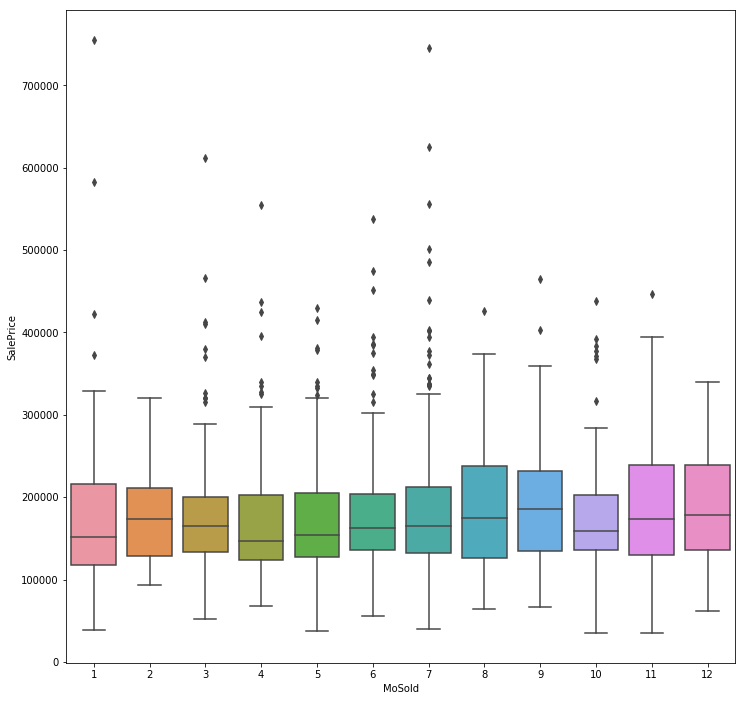

In [29]:
plt.figure(figsize = (12,12))
sns.boxplot(y = 'SalePrice', x = 'MoSold', data = df)

In [30]:
sns.countplot(x = 'MoSold', data = df)

In [31]:
df['MoSold'] = df['MoSold'].astype('str')

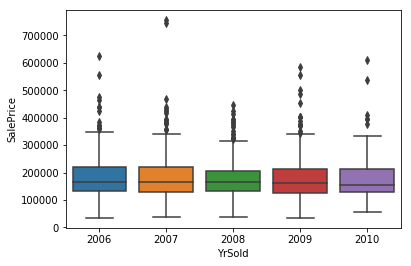

In [32]:
sns.boxplot(x = 'YrSold', y = 'SalePrice', data = df)

In [33]:
sns.jointplot(x = 'GrLivArea', y = 'SalePrice', data = df)

In [34]:
df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index, inplace = True)

In [35]:
df.shape

(1458, 76)

### Modelowanie

In [37]:
import h2o

In [39]:
h2o.init(max_mem_size= '6G')

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ---------------------------------------------------------
H2O cluster uptime:         18 hours 8 mins
H2O cluster timezone:       Europe/Belgrade
H2O data parsing timezone:  UTC
H2O cluster version:        3.26.0.8
H2O cluster version age:    12 days
H2O cluster name:           H2O_from_python_ewaru_lr4k6s
H2O cluster total nodes:    1
H2O cluster free memory:    3.393 Gb
H2O cluster total cores:    4
H2O cluster allowed cores:  4
H2O cluster status:         locked, healthy
H2O connection url:         http://localhost:54321
H2O connection proxy:       {'http': None, 'https': None}
H2O internal security:      False
H2O API Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python version:             3.6.9 final
--------------------------  ---------------------------------------------------------

In [40]:
# zamykamy połączenie z klastrem h2o
#h2o.cluster().shutdown()

In [42]:
#h2o.remove_all() # usuwam wszystko co miałam

In [44]:
df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


### Zbiór treningowy i walidacyjny

In [49]:
train, val = df.split_frame([0.8])

### Siatka parametrów (hyperparameters)

In [50]:
params = {
    'epochs': [20, 50, 70, 80],
    'hidden': [50, [30, 30], 80, [100, 100]],
    'activation': ['Tanh', 'Rectifier', 'Rectifier with dropout']   
}

In [52]:
model = h2o.grid.H2OGridSearch(h2o.estimators.H2ODeepLearningEstimator,
                            hyper_params = params,
                            grid_id = "grid" 
                            )

In [53]:
model.train(y = "SalePrice",
            training_frame= train,
            validation_frame=val)

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [55]:
model.get_grid("RMSE")

                activation epochs      hidden      model_ids  \
0     RectifierWithDropout   70.0        [80]  grid_model_33   
1     RectifierWithDropout   50.0  [100, 100]  grid_model_42   
2     RectifierWithDropout   80.0        [80]  grid_model_36   
3     RectifierWithDropout   50.0        [80]  grid_model_30   
4     RectifierWithDropout   20.0        [80]  grid_model_27   
5     RectifierWithDropout   80.0        [50]  grid_model_12   
6                     Tanh   50.0  [100, 100]  grid_model_40   
7                     Tanh   70.0        [80]  grid_model_31   
8     RectifierWithDropout   70.0        [50]   grid_model_9   
9     RectifierWithDropout   70.0  [100, 100]  grid_model_45   
10                    Tanh   70.0  [100, 100]  grid_model_43   
11               Rectifier   80.0    [30, 30]  grid_model_23   
12    RectifierWithDropout   50.0        [50]   grid_model_6   
13    RectifierWithDropout   20.0        [50]   grid_model_3   
14               Rectifier   70.0  [100,

In [56]:
best = h2o.get_model("grid_model_33")

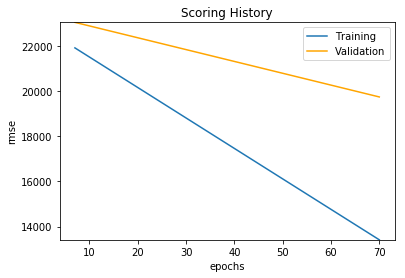

In [57]:
best.plot()

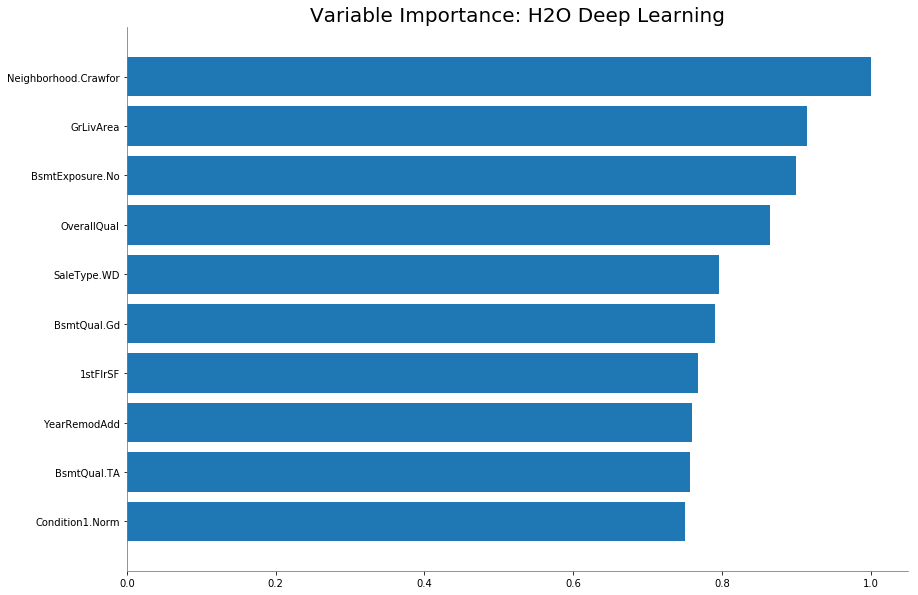

In [58]:
best.varimp_plot()

### Zapisywanie modelu

In [59]:
h2o.save_model(best)
#best.save_mojo() # do wykorzystania w javie

'C:\\Users\\ewaru\\OneDrive\\Documents\\Python\\Machine Learning z Python\\Szkolenie ML z Python 28-30.10.2019\\MateriaĹ‚y dla uczestnikĂłw puste\\6. Decision trees\\grid_model_33'

### Wczytywanie modelu

In [61]:
best = h2o.load_model("grid_model_33")

### Model RF dla porównania

In [77]:
rf = h2o.estimators.H2ORandomForestEstimator(nfolds = 5, max_depth = 30,
                                            ntrees = 500)

In [78]:
rf.train(y = "SalePrice",
            training_frame= train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [80]:
rf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1572359363582_10


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0              500.0                     500.0            4568142.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0       17.0       30.0      21.172       679.0       761.0       721.88



ModelMetricsRegression: drf
** Reported on train data. **

MSE: 649861723.4936402
RMSE: 25492.385598324065
MAE: 15821.56338109175
RMSLE: 0.13250621156330142
Mean Residual Deviance: 649861723.4936402

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 693169846.4291494
RMSE: 26328.118930701246
MAE: 16315.523523934477
RMSLE: 0.1353082052578958
Mean Residual Deviance: 693169846.4291494

Cross-Validation Metrics Summary: 


mean           sd   cv_1_valid   cv_2_valid  \
0                     mae    16325.941     938.8407    17143.982    15699.089   
1  mean_residual_deviance  6.9478726E8  8.7914032E7  8.1597203E8  6.5918163E8   
2                     mse  6.9478726E8  8.7914032E7  8.1597203E8  6.5918163E8   
3                      r2    0.8852359  0.016029645    0.8750086    0.8965624   
4       residual_deviance  6.9478726E8  8.7914032E7  8.1597203E8  6.5918163E8   
5                    rmse    26316.273     1673.686    28565.225    25674.533   
6                   rmsle   0.13440917  0.013127452   0.15249163   0.12757808   

   cv_3_valid   cv_4_valid   cv_5_valid  
0   15830.725    15435.819    17520.092  
1  7.055623E8  5.7518246E8  7.1803789E8  
2  7.055623E8  5.7518246E8  7.1803789E8  
3  0.89457756    0.8619442    0.8980866  
4  7.055623E8  5.7518246E8  7.1803789E8  
5   26562.422    23982.963     26796.23  
6  0.12380635   0.14416088   0.12400893


Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2019-10-30 11:03:00  58.978 sec              0.0            NaN   
1     2019-10-30 11:03:00  59.015 sec              1.0   43815.375536   
2     2019-10-30 11:03:00  59.048 sec              2.0   42004.424357   
3     2019-10-30 11:03:00  59.093 sec              3.0   41321.011387   
4     2019-10-30 11:03:00  59.127 sec              4.0   39023.267303   
5     2019-10-30 11:03:00  59.161 sec              5.0   36821.939515   
6     2019-10-30 11:03:00  59.195 sec              6.0   34948.114619   
7     2019-10-30 11:03:00  59.228 sec              7.0   35014.179390   
8     2019-10-30 11:03:00  59.262 sec              8.0   32932.241165   
9     2019-10-30 11:03:00  59.296 sec              9.0   31853.814604   
10    2019-10-30 11:03:00  59.330 sec             10.0   30879.650229   
11    2019-10-30 11:03:00  59.363 sec             11.0   30540.269455   
12    2019-10-30 11:03:00  59.396 sec             12.0   30559.707927   
13    2019-10-30 11:03:00  59.429 sec             13.0   30674.631661   
14    2019-10-30 11:03:00  59.464 sec             14.0   30133.962362   
15    2019-10-30 11:03:01  59.498 sec             15.0   29133.774840   
16    2019-10-30 11:03:01  59.532 sec             16.0   29240.050542   
17    2019-10-30 11:03:01  59.566 sec             17.0   28973.754966   
18    2019-10-30 11:03:01  59.600 sec             18.0   28885.191561   
19    2019-10-30 11:03:01  59.635 sec             19.0   28930.755536   

    training_mae  training_deviance  
0            NaN                NaN  
1   27051.167901       1.919787e+09  
2   26748.944615       1.764372e+09  
3   25889.066706       1.707426e+09  
4   24567.373566       1.522815e+09  
5   23285.990220       1.355855e+09  
6   22452.299352       1.221371e+09  
7   22032.702110       1.225993e+09  
8   21136.580846       1.084533e+09  
9   20620.989932       1.014666e+09  
10  19991.001347       9.535528e+08  
11  19787.631067       9.327081e+08  
12  19557.558042       9.338957e+08  
13  19467.491542       9.409330e+08  
14  19092.982307       9.080557e+08  
15  18501.217130       8.487768e+08  
16  18308.169194       8.549806e+08  
17  18101.043327       8.394785e+08  
18  18063.326631       8.343543e+08  
19  18135.909841       8.369886e+08


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0    OverallQual         7.343661e+14           1.000000    0.261981
1      ExterQual         3.664698e+14           0.499029    0.130736
2   Neighborhood         3.453134e+14           0.470220    0.123189
3      GrLivArea         2.488327e+14           0.338840    0.088770
4     GarageCars         1.698766e+14           0.231324    0.060603
5    TotalBsmtSF         1.089032e+14           0.148296    0.038851
6    KitchenQual         1.051978e+14           0.143250    0.037529
7       1stFlrSF         8.298829e+13           0.113007    0.029606
8       BsmtQual         7.840652e+13           0.106768    0.027971
9     BsmtFinSF1         5.614138e+13           0.076449    0.020028
10    GarageArea         4.413570e+13           0.060100    0.015745
11     YearBuilt         4.041238e+13           0.055030    0.014417
12      2ndFlrSF         3.740482e+13           0.050935    0.013344
13  TotRmsAbvGrd         3.501423e+13           0.047680    0.012491
14      FullBath         3.172059e+13           0.043195    0.011316
15   FireplaceQu         2.244036e+13           0.030557    0.008005
16       LotArea         2.134170e+13           0.029061    0.007614
17   Exterior2nd         1.524102e+13           0.020754    0.005437
18   Exterior1st         1.473143e+13           0.020060    0.005255
19  YearRemodAdd         1.403272e+13           0.019109    0.005006


See the whole table with table.as_data_frame()


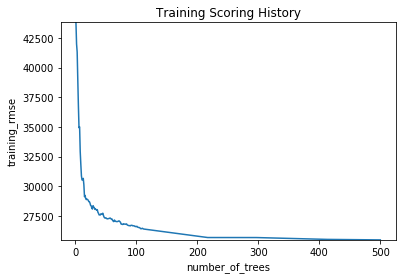

In [79]:
rf.plot()

In [72]:
rf.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_model_python_1572359363582_8',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_model_python_1572359363582_8'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_7_sid_9286',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_7_sid_9286'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 0},
 'keep_cross_validation_models': {'default': True, 'actual': True},
 'keep_cross_validation_predictions': {'default': False, 'actual': False},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteration': {'default': False, 'actual': False},
 'score_tree_interval': {'default': 0, 'actual': 0},
 'fold_assignment': {'default': 'AUTO', 'actual': 'AU